In [50]:
from glob import glob
from datetime import datetime
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
from tqdm import tqdm
import cftime

import pyart
from netCDF4 import Dataset

In [ ]:
radar_id = '02'
date_str = '20181120'
dp_path = f'/g/data/rq0/admin/dp-rain-verification-testing/cfradial/{radar_id}/{date_str}'
dp_ffn_list = sorted(glob(dp_path + '/*.nc'))
time_fmt = mdates.DateFormatter('%H:%M')

In [81]:
td_ts = []
alpha_ts = []
alpha_method_ts = []
system_phase_ts = []
mean_dp_rr = []

for dp_ffn in tqdm(dp_ffn_list, total=len(dp_ffn_list)):
    with Dataset(dp_ffn) as radar:
        td_ts.append(cftime.num2pydate(radar['time'][0], radar['time'].units))
        alpha_ts.append(radar['specific_attenuation'].alpha)
        alpha_method_ts.append(radar['specific_attenuation'].alpha_method)
        system_phase_ts.append(radar['PHIDP_B'].system_phase)
        mean_dp_rr.append(np.nanmean(radar['ah_rainrate'][:]))

100%|██████████| 216/216 [00:46<00:00,  4.69it/s]


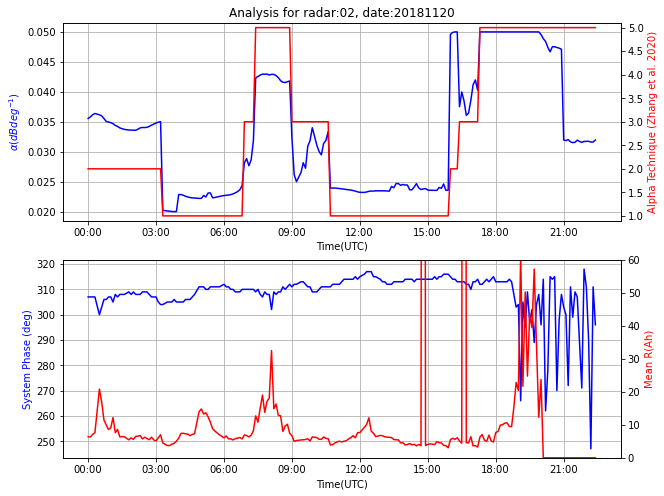

In [83]:
plt.figure(figsize=[10,8])

ax1 = plt.subplot(211)
ax1.set_title(f'Analysis for radar:{radar_id}, date:{date_str}')
ax1.plot(td_ts, alpha_ts, 'b-')
ax1.set_xlabel('Time(UTC)')
ax1.set_ylabel(r"$ \alpha (dB deg^{-1})$", color='b')
ax1.xaxis.set_major_formatter(time_fmt)
ax1.grid()
ax1a = ax1.twinx()
ax1a.plot(td_ts, alpha_method_ts, 'r-')
ax1a.set_ylim(0.9,5.1)
ax1a.set_ylabel("Alpha Technique (Zhang et al. 2020)", color='r')
ax1a.xaxis.set_major_formatter(time_fmt)

ax2 = plt.subplot(212)
ax2.plot(td_ts, system_phase_ts, 'b-')
ax2.set_xlabel('Time(UTC)')
ax2.set_ylabel("System Phase (deg)", color='b')
ax2.xaxis.set_major_formatter(time_fmt)
ax2.grid()
ax2a = ax2.twinx()
ax2a.plot(td_ts, mean_dp_rr, 'r-')
ax2a.set_ylim(0,60)
ax2a.set_ylabel("Mean R(Ah)", color='r')
ax2a.xaxis.set_major_formatter(time_fmt)